In [8]:
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [11]:
df = pd.read_csv("https://s3.amazonaws.com/talent-assets.datacamp.com/food_claims_2212.csv", delimiter=",")
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [4]:
df.tail()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat
1999,2000,150,R$ 8051.4,6417.92,RECIFE,4,False,vegetable


In [71]:
df.columns

Index(['claim_id', 'time_to_close', 'claim_amount', 'amount_paid', 'location',
       'individuals_on_claim', 'linked_cases', 'cause'],
      dtype='object')

In [14]:
df.describe(include="O")

,claim_amount,location,linked_cases,cause
count,2000,2000,1974,2000
unique,2000,4,2,5
top,R$ 74474.55,RECIFE,False,meat
freq,1,885,1493,943


In [36]:
df.dtypes

claim_id                  int64
time_to_close             int64
claim_amount            float64
amount_paid             float64
location                 object
individuals_on_claim      int64
linked_cases               bool
cause                    object
dtype: object

In [5]:
df.isnull().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

In [15]:
df.shape

(2000, 8)

##TASK 1

The original dataset contains 2000 rows and 8 columns.First, when reviewing the data set, we realized that the data was made up of int64, float, object, and bool data types. We proceeded to analyze the database to proceed with the correction, modification and elimination, as appropriate, of values throughout the data frame, which continues to be detailed.
When reviewing the 'claim_amount' and 'paid_amount' columns, they were originally in (string) format, so we converted them to a floating number format to make numbers easier to work on.
Missing values were found in the 'amount_paid' columns, with 36, and in the 'linked_cases' column, with 26.
The dataset was processed to handle missing values and format issues. The 'time_to_close' column required no changes as it had no missing values. The 'claim_amount' column was converted from string to floating-point numbers for numerical operations and rounded to two decimal places. The 'amount_paid' column had missing values, which were replaced with the overall median. The 'location' column had no missing values and contained four specific expected types. The 'linked_cases' column had missing values filled with "FALSE." Lastly, the 'cause' column was corrected for two repeated values and categorized into "vegetable," "meat," or "unknown." These steps ensured data consistency and allowed for further analysis of the dataset.




-There were 4 location types, as expected. There were no missing values.

-There were 3 types of cause, as expected. There were no missing values.

-There were 5 causes types linked, originally being corrected, remaining in only 3, as expected, but missing values were also found.We found 5 (unknown', 'meat', 'vegetable', ' Meat', 'VEGETABLES'), after fix we got just 3 (unknown', 'meat', 'vegetable')

-There were 36 missing 'amount_paid' values, as found in the analysis. We replace the missing value by the mean.

-The 'claim_amount' column was in string format and we cast it to a float numeric type to allow for numeric parsing.


In [16]:
df['claim_amount'] = df['claim_amount'].replace({'R\$ ': ''}, regex=True).astype(float)
df['amount_paid'] = df['amount_paid'].astype(float)

In [38]:
decimal_places_check = df['claim_amount'].apply(lambda x: len(str(x).split('.')[1]) == 2 if '.' in str(x) else False)

all_two_decimal_places = decimal_places_check.all()

all_two_decimal_places


False

In [39]:
df['claim_amount'] = df['claim_amount'].round(2)


In [17]:
amount_paid_mean = df['amount_paid'].mean()
df['amount_paid'] = df['amount_paid'].replace(np.nan, amount_paid_mean)

In [41]:
decimal_places_check2 = df['amount_paid'].apply(lambda x: len(str(x).split('.')[1]) == 2 if '.' in str(x) else False)

all_two_decimal_places2 = decimal_places_check2.all()

all_two_decimal_places2


False

In [42]:
df['amount_paid'] = df['amount_paid'].round(2)


In [46]:
df['claim_amount'] = df['claim_amount'].round(2)
df['claim_amount'] = df['claim_amount'].apply(lambda x: f"{x:.2f}")

df['amount_paid'] = df['amount_paid'].round(2)
df['amount_paid'] = df['amount_paid'].apply(lambda x: f"{x:.2f}")


In [18]:
df['location'].unique()

array(['RECIFE', 'FORTALEZA', 'SAO LUIS', 'NATAL'], dtype=object)

In [19]:
print(df['linked_cases'])

0       False
1        True
2        True
3       False
4       False
        ...  
1995    False
1996     True
1997     True
1998    False
1999    False
Name: linked_cases, Length: 2000, dtype: object


In [21]:
df['linked_cases'].isnull().sum()

26

In [24]:
df['linked_cases'].fillna(False, inplace=True)

In [26]:
#values Should be:"vegetable", "meat" o "unknown"
df['cause'].unique()

array(['unknown', 'meat', 'vegetable', ' Meat', 'VEGETABLES'],
      dtype=object)

In [27]:
df['cause'] = df['cause'].replace({' Meat': 'meat', 'VEGETABLES': 'vegetable'})


In [28]:
df['cause'].unique()

array(['unknown', 'meat', 'vegetable'], dtype=object)

In [43]:
df.isnull().sum()

claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64

In [44]:
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable


In [47]:
# Verifying if the values in the 'claim_amount' column are rounded to two decimal places
claim_amount_decimal_check = df['claim_amount'].apply(lambda x: len(str(x).split('.')[1]) == 2 if '.' in str(x) else False)
claim_amount_two_decimals = claim_amount_decimal_check.all()

# Verifying if the values in the 'amount_paid' column are rounded to two decimal places
amount_paid_decimal_check = df['amount_paid'].apply(lambda x: len(str(x).split('.')[1]) == 2 if '.' in str(x) else False)
amount_paid_two_decimals = amount_paid_decimal_check.all()

claim_amount_two_decimals, amount_paid_two_decimals


(True, True)

In [48]:
df

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,28982.30,24265.02,RECIFE,10,False,meat
1996,1997,166,5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,23516.28,23310.24,RECIFE,9,False,meat


##TASK 2

There are four possible types of location .The location "RECIFE" has the most observations, closely followed by "SAO LUIS".The observations are not balanced. There is a noticeable difference in the number of claims between the different locations, with "FORTALEZA" and "SAO LUIS" having more claims compared to "RECIFE" and "NATAL". We must focus on RECIFES claims as they are more common. Therefore, the observations are not balanced between the categories of the location variable.

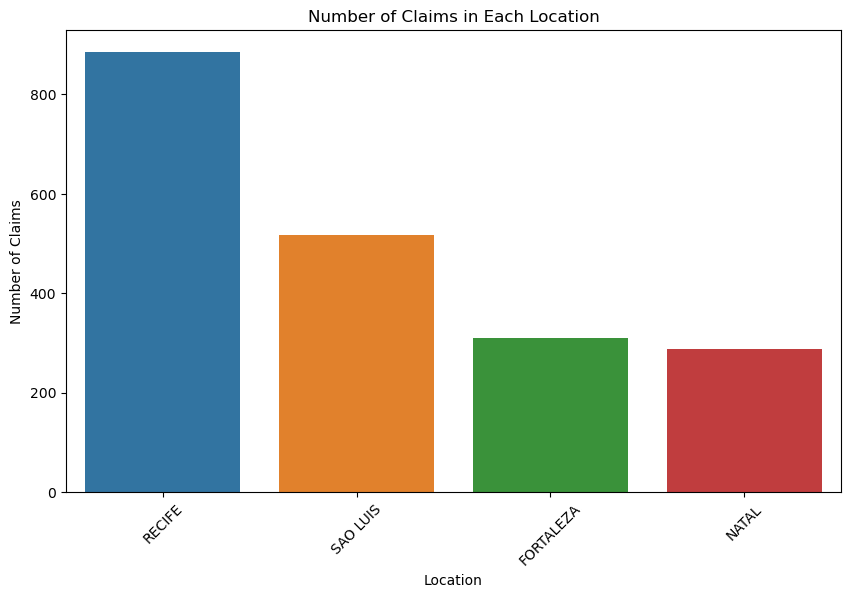

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(x='location', data=df, order=df['location'].value_counts().index)
plt.title('Number of Claims in Each Location')
plt.xlabel('Location')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.show()


##TASK 3

In [62]:
"""plt.figure(figsize=(10, 6))
sns.kdeplot(df['time_to_close'], shade=True, color='blue')
plt.title('Shutdown Time Distribution (KDE)')
plt.xlabel('Time to close')
plt.ylabel('Density')
plt.show()
"""


"plt.figure(figsize=(10, 6))\nsns.kdeplot(df['time_to_close'], shade=True, color='blue')\nplt.title('Shutdown Time Distribution (KDE)')\nplt.xlabel('Time to close')\nplt.ylabel('Density')\nplt.show()\n"

In [76]:
"""plt.figure(figsize=(10, 6))
plt.hist(df['time_to_close'], bins=90, edgecolor='black', color='skyblue')
plt.title('Shutdown Time Distribution')
plt.xlabel('Time to close')
plt.ylabel('Density')
plt.show()
"""


"plt.figure(figsize=(10, 6))\nplt.hist(df['time_to_close'], bins=90, edgecolor='black', color='skyblue')\nplt.title('Shutdown Time Distribution')\nplt.xlabel('Time to close')\nplt.ylabel('Density')\nplt.show()\n"

##TASK 3

Most of the claims are handled efficiently considering that they are closed in a short period (less than 200 days), grouping most of the cases on the left side of the graph, indicating that these are resolved quickly. However, there are atypical cases that take more than 275 days to close, which could mean these specific cases are more complex, requiring timely treatment.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


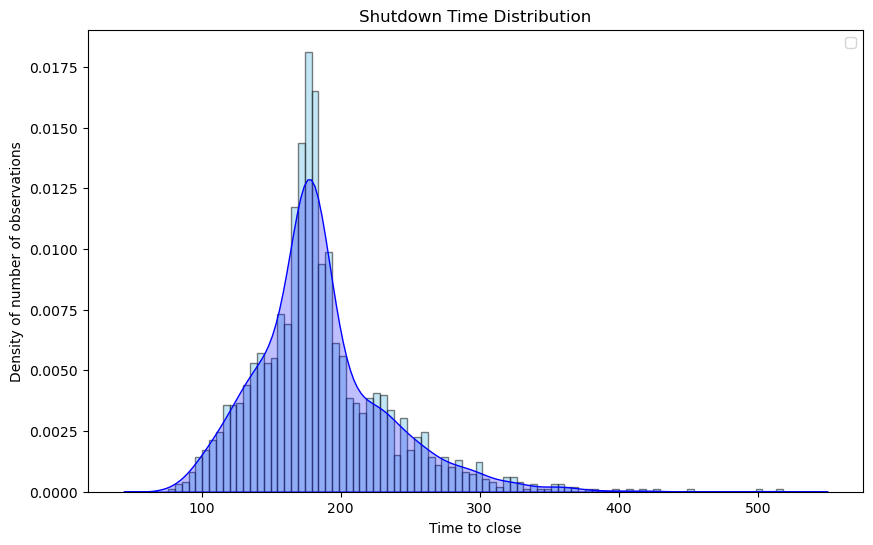

In [74]:
plt.figure(figsize=(10, 6))
plt.hist(df['time_to_close'], bins=90, edgecolor='black', color='skyblue', alpha=0.5, density=True)

sns.kdeplot(df['time_to_close'], shade=True, color='blue')

plt.title('Shutdown Time Distribution')
plt.xlabel('Time to close')
plt.ylabel('Density of number of observations')
plt.legend()
plt.show()


##TASK 4

Thhe distribution of time to close claims varies between different locations.The presence of outliers can distort the interpretation of the data, making it appear that there are more significant differences between conditions thann there really are. These outliers may represent rare cases that took much longer to close.

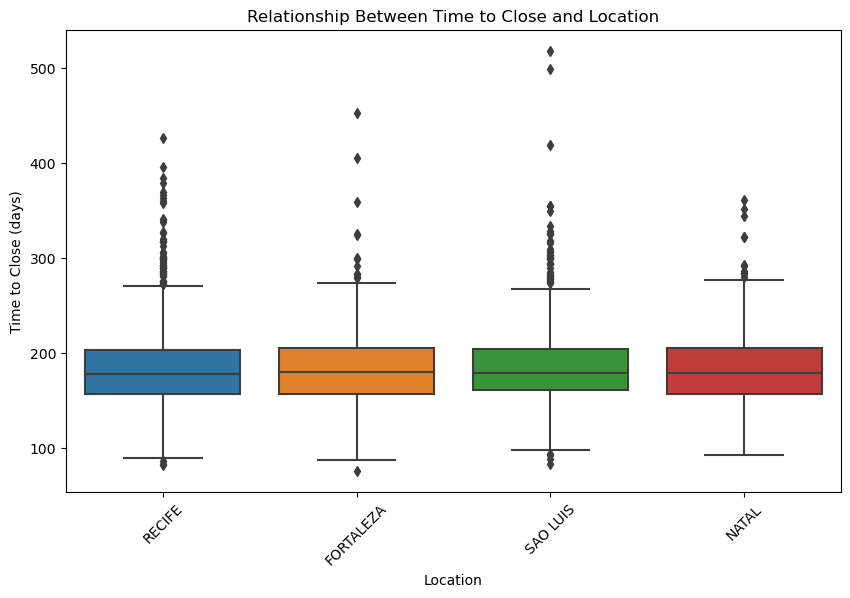

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='time_to_close', data=df)
plt.title('Relationship Between Time to Close and Location')
plt.xlabel('Location')
plt.ylabel('Time to Close (days)')
plt.xticks(rotation=45)
plt.show()


##Relationship Between Time to Close and Location (95th Percentile)

The relationship between closing time and location appears to be more subtle. Although there are some differences in the median and quartiles between the locations, these differences are not as pronounced.The variation in closing time between locations is minimal, encouraging claims handling to focus on efficiency rather than differences between locations, even in areas with a higher volume of claims, we should not ignore the differences significant.

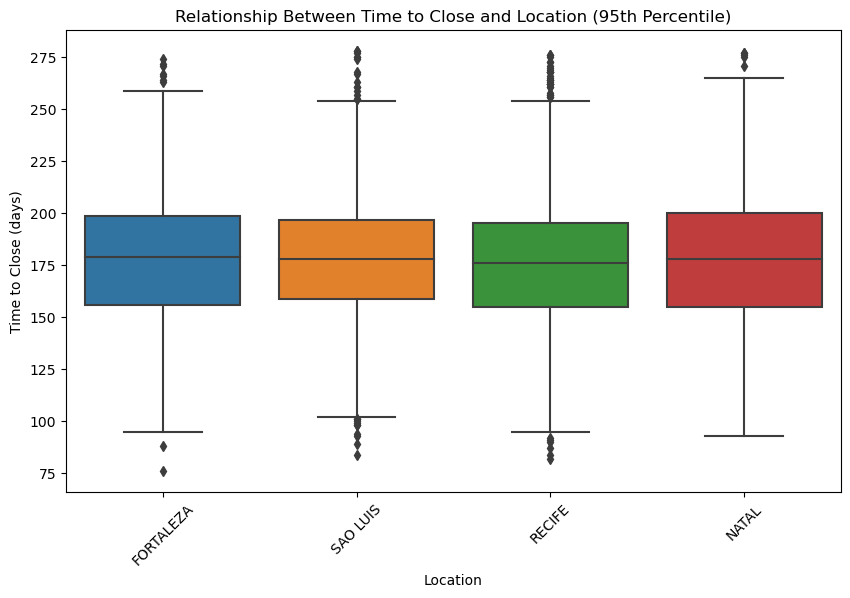

In [66]:
percentile_95_cutoff = df['time_to_close'].quantile(0.95)
filtered_data = df[df['time_to_close'] <= percentile_95_cutoff]

plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='time_to_close', data=filtered_data)
plt.title('Relationship Between Time to Close and Location (95th Percentile)')
plt.xlabel('Location')
plt.ylabel('Time to Close (days)')
plt.xticks(rotation=45)
plt.show()



When analyzing the main range of time it takes for claims, we have noticed that while "fortaleza" and "recife" have the highest number of claims, the interquartile range of time to close claims is similar on all occasions. This suggests that most claims, regardless of location, are closed in a similar time frame. This could be influenced by the similar number of claims at each location, with the high volume of claims with low closing times contributing to a similar median.

Given this, the legal team should focus on strategies to improve their response time to clients and expedite the closing of claims. It's important to note that most claims close in less than 200 days, but you should also be prepared to handle claims that can take more than 275 days to close. We must not forget the influence of outliers in our analysis. These edge cases may have initially distorted the true trends in the data. In making the decision to eliminate these outliers up to the 95th percentile, we sought to gain a clearer view of the closing differences and similarities, so that we could focus on the primary data ranges of the claims.

we were able to get a clearer and fairer view of the differences and similarities in closing time between the rooms. This action allowed for a more accurate and relevant interpretation for the 'Vivendo' legal team, focusing on the main range of data that represents the majority of claims.

###Recommendation

In the real context and considering that the teams of lawyers are in different regions of the country (Brazil) with different customs and idiosyncrasies, it would be recommendable that in certain circumstances the teams of each region evaluate, based on their experience in the area, how to resolve outliers. .(considering the characteristics of the place such as climate and temperature that could influence the food and therefore claims).The above can influence and should be considered in the analysis to have a better understanding